In [1]:
#coding: utf-8

In [2]:
import math
import numpy as np

from sklearn.externals.joblib import Memory
from sklearn.datasets import load_svmlight_file
from sklearn.metrics import classification_report

from numpy import random
import random as rd

import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
def get_data(filename):
    data = load_svmlight_file(filename)
    return data[0], data[1]

In [4]:
iters = 500

X_train, y_train = get_data("a9a.txt")
X_test, y_test = get_data("a9a.t.txt")

X_train = X_train.toarray()
X_test = X_test.toarray()


print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

print(type(X_train))
print(type(y_train))

(32561, 123)
(32561,)
(16281, 122)
(16281,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [5]:
def predict(X, weight):
    threshold = 0
    app = np.ones(X.shape[0]).reshape(-1, 1)
    app_zeors = np.zeros(X_test.shape[0]).reshape(-1, 1)

    X = np.append(X,app,axis=1)
    X = np.append(X,app_zeors,axis=1)

    y_ = np.dot(X, weight)

    y_[y_ >= threshold] = 1
    y_[y_ < threshold] = -1
    return y_

In [6]:
def train_in_gd(X_train, y_train, X_test, y_test):
    C = 1
    a = 0.1
    percent = 0.2
    id_list = [x for x in range(0, X_train.shape[0])]
    
    train_loss = []
    test_loss = []
    
    app = np.ones(X_train.shape[0]).reshape(-1, 1)
    X_train = np.append(X_train,app,axis=1)
    
    app_test = np.ones(X_test.shape[0]).reshape(-1, 1)
    app_test_zeors = np.zeros(X_test.shape[0]).reshape(-1, 1)
    #print(X_test.shape)
    X_test = np.append(X_test,app_test_zeors,axis=1)
    X_test = np.append(X_test,app_test,axis=1)
    weight = random.random(size=(X_train.shape[1], 1))
    for i in range(iters):
        
        id_ = rd.sample(id_list, int(X_train.shape[0] * percent)) 
        X_train_sub = X_train[id_]
        y_train_sub = y_train[id_]
        
        y_ = np.dot(X_train, weight)
        cn_tmp = 1 - y_train.reshape(-1, 1) * y_      
        cn_tmp[cn_tmp < 0] = 0
        
        w = np.sum(np.power(weight, 2))
        
        loss = np.sum(cn_tmp, axis=0)
        loss = C * loss / X_train.shape[0] + w / 2
        train_loss.append(loss[0])
        
        y_test = np.dot(X_test, weight)
        cn_tmp_test = 1 - y_test.reshape(-1, 1) * y_test      
        cn_tmp_test[cn_tmp_test < 0] = 0
        loss_ = np.sum(cn_tmp_test, axis=0)
        loss_ = C * loss_ / X_test.shape[0] + w/2
        test_loss.append(loss_[0])
        
        y_ = np.dot(X_train_sub, weight)
        tmp = 1 - y_train_sub.reshape(-1, 1) * y_
        tmp[tmp > 0] = 1
        tmp[tmp <= 0] = 0
        
        d = y_train_sub.reshape(-1, 1) * X_train_sub
        d = d * tmp
        d = -np.mean(d, axis=0)
        d =  weight + C * d.reshape(-1, 1)
        weight = weight - a * d
    return train_loss, test_loss, weight

In [7]:
train_loss_gd, test_loss_gd, weight_gd = train_in_gd(X_train, y_train, X_test, y_test)

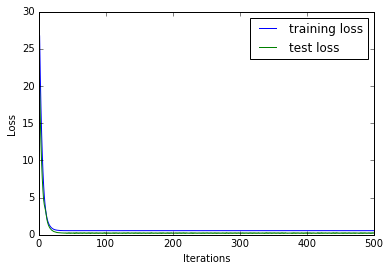

In [8]:
%matplotlib inline
plot_x = np.linspace(1, iters, iters)
train_loss_gd = np.array(train_loss_gd)
dev_loss_gd = np.array(test_loss_gd)
plt.figure(1)
plt.plot(plot_x, train_loss_gd, label="training loss")
plt.plot(plot_x, dev_loss_gd, label="test loss")
plt.legend(loc="upper right")
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

In [9]:
ytest_ = predict(X_test, weight_gd)
target_names = ['class 1', 'class 2']
print(classification_report(y_test, ytest_.T[0], target_names=target_names))

             precision    recall  f1-score   support

    class 1       0.76      1.00      0.87     12435
    class 2       0.00      0.00      0.00      3846

avg / total       0.58      0.76      0.66     16281



F:\python\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [10]:
def train_in_NAG(X_train, y_train, X_test, y_test):
    C = 1
    a = 0.1
    percent = 0.2
    id_list = [x for x in range(0, X_train.shape[0])]
    
    train_loss = []
    test_loss = []
    
    app = np.ones(X_train.shape[0]).reshape(-1, 1)
    X_train = np.append(X_train,app,axis=1)
    
    app_test = np.ones(X_test.shape[0]).reshape(-1, 1)
    app_test_zeors = np.zeros(X_test.shape[0]).reshape(-1, 1)
    #print(X_test.shape)
    X_test = np.append(X_test,app_test_zeors,axis=1)
    X_test = np.append(X_test,app_test,axis=1)
    weight = random.random(size=(X_train.shape[1], 1))
    
    theta = 0.9   
    vt = np.zeros(weight.shape)
    for i in range(iters):
        
        id_ = rd.sample(id_list, int(X_train.shape[0] * percent)) 
        X_train_sub = X_train[id_]
        y_train_sub = y_train[id_]
        
        y_ = np.dot(X_train, weight)
        cn_tmp = 1 - y_train.reshape(-1, 1) * y_      
        cn_tmp[cn_tmp < 0] = 0
        
        w = np.sum(np.power(weight, 2))
        
        loss = np.sum(cn_tmp, axis=0)
        loss = C * loss / X_train.shape[0] + w / 2
        train_loss.append(loss[0])
        
        y_test = np.dot(X_test, weight)
        cn_tmp_test = 1 - y_test.reshape(-1, 1) * y_test      
        cn_tmp_test[cn_tmp_test < 0] = 0
        loss_ = np.sum(cn_tmp_test, axis=0)
        loss_ = C * loss_ / X_test.shape[0] + w/2
        test_loss.append(loss_[0])
        
        y_ = np.dot(X_train_sub, weight)
        tmp = 1 - y_train_sub.reshape(-1, 1) * y_
        tmp[tmp > 0] = 1
        tmp[tmp <= 0] = 0
        
        d = y_train_sub.reshape(-1, 1) * X_train_sub
        d = d * tmp
        d = -np.mean(d, axis=0)
        d =  weight + C * d.reshape(-1, 1)
        
        vt = theta * vt + a * d.reshape(-1, 1)
        weight = weight - vt
    return train_loss, test_loss, weight

In [11]:
train_loss_NAG, test_loss_NAG, weight_NAG = train_in_NAG(X_train, y_train, X_test, y_test)

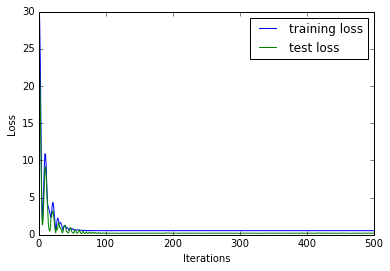

In [12]:
%matplotlib inline
plot_x = np.linspace(1, iters, iters)
train_loss_NAG = np.array(train_loss_NAG)
test_loss_NAG = np.array(test_loss_NAG)
plt.figure(1)
plt.plot(plot_x, train_loss_NAG, label="training loss")
plt.plot(plot_x, test_loss_NAG, label="test loss")
plt.legend(loc="upper right")
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

In [13]:
ytest_ = predict(X_test, weight_NAG)
target_names = ['class 1', 'class 2']
print(classification_report(y_test, ytest_.T[0], target_names=target_names))

             precision    recall  f1-score   support

    class 1       0.76      1.00      0.87     12435
    class 2       0.00      0.00      0.00      3846

avg / total       0.58      0.76      0.66     16281



F:\python\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [14]:
def train_in_RMSProp(X_train, y_train, X_test, y_test):
    C = 1
    a = 0.1
    percent = 0.2
    id_list = [x for x in range(0, X_train.shape[0])]
    
    train_loss = []
    test_loss = []
    
    app = np.ones(X_train.shape[0]).reshape(-1, 1)
    X_train = np.append(X_train,app,axis=1)
    
    app_test = np.ones(X_test.shape[0]).reshape(-1, 1)
    app_test_zeors = np.zeros(X_test.shape[0]).reshape(-1, 1)
    #print(X_test.shape)
    X_test = np.append(X_test,app_test_zeors,axis=1)
    X_test = np.append(X_test,app_test,axis=1)  
    weight = random.random(size=(X_train.shape[1], 1))
    
    gt = 0
    epsilon = 1e-8
    gamma = 0.9
    for i in range(iters):
        
        id_ = rd.sample(id_list, int(X_train.shape[0] * percent)) 
        X_train_sub = X_train[id_]
        y_train_sub = y_train[id_]
        
        y_ = np.dot(X_train, weight)
        cn_tmp = 1 - y_train.reshape(-1, 1) * y_      
        cn_tmp[cn_tmp < 0] = 0
        
        w = np.sum(np.power(weight, 2))
        
        loss = np.sum(cn_tmp, axis=0)
        loss = C * loss / X_train.shape[0] + w / 2
        train_loss.append(loss[0])
        
        y_test = np.dot(X_test, weight)
        cn_tmp_test = 1 - y_test.reshape(-1, 1) * y_test      
        cn_tmp_test[cn_tmp_test < 0] = 0
        loss_ = np.sum(cn_tmp_test, axis=0)
        loss_ = C * loss_ / X_test.shape[0] + w/2
        test_loss.append(loss_[0])
        
        y_ = np.dot(X_train_sub, weight)
        tmp = 1 - y_train_sub.reshape(-1, 1) * y_
        tmp[tmp > 0] = 1
        tmp[tmp <= 0] = 0
        
        d = y_train_sub.reshape(-1, 1) * X_train_sub
        d = d * tmp
        d = -np.mean(d, axis=0)
        d =  weight + C * d.reshape(-1, 1)
        
        gt = gamma * gt + (1 - gamma) * d * d

        weight = weight - (a / np.sqrt(gt + epsilon)) * d
    return train_loss, test_loss, weight

In [15]:
train_loss_RMSProp, test_loss_RMSProp, weight_RMSProp = train_in_RMSProp(X_train, y_train, X_test, y_test)

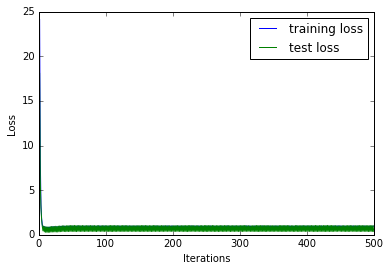

In [16]:
%matplotlib inline
plot_x = np.linspace(1, iters, iters)
train_loss_RMSProp = np.array(train_loss_RMSProp)
test_loss_RMSProp = np.array(test_loss_RMSProp)
plt.figure(1)
plt.plot(plot_x, train_loss_RMSProp, label="training loss")
plt.plot(plot_x, test_loss_RMSProp, label="test loss")
plt.legend(loc="upper right")
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

In [17]:
ytest_ = predict(X_test, weight_RMSProp)
target_names = ['class 1', 'class 2']
print(classification_report(y_test, ytest_.T[0], target_names=target_names))

             precision    recall  f1-score   support

    class 1       0.92      0.75      0.82     12435
    class 2       0.49      0.79      0.61      3846

avg / total       0.82      0.76      0.77     16281



In [18]:
def train_in_AdaDelta(X_train, y_train, X_test, y_test):
    C = 1
    percent = 0.2
    id_list = [x for x in range(0, X_train.shape[0])]
    
    train_loss = []
    test_loss = []
    
    app = np.ones(X_train.shape[0]).reshape(-1, 1)
    X_train = np.append(X_train,app,axis=1)
    
    app_test = np.ones(X_test.shape[0]).reshape(-1, 1)
    app_test_zeors = np.zeros(X_test.shape[0]).reshape(-1, 1)
    #print(X_test.shape)
    X_test = np.append(X_test,app_test_zeors,axis=1)
    X_test = np.append(X_test,app_test,axis=1)    
    weight = random.random(size=(X_train.shape[1], 1))
    
    gt = 0
    epsilon = 1e-6
    gamma = 0.95
    t = 0
    for i in range(iters):
        
        id_ = rd.sample(id_list, int(X_train.shape[0] * percent)) 
        X_train_sub = X_train[id_]
        y_train_sub = y_train[id_]
        
        y_ = np.dot(X_train, weight)
        cn_tmp = 1 - y_train.reshape(-1, 1) * y_      
        cn_tmp[cn_tmp < 0] = 0
        
        w = np.sum(np.power(weight, 2))
        
        loss = np.sum(cn_tmp, axis=0)
        loss = C * loss / X_train.shape[0] + w / 2
        train_loss.append(loss[0])
        
        y_test = np.dot(X_test, weight)
        cn_tmp_test = 1 - y_test.reshape(-1, 1) * y_test      
        cn_tmp_test[cn_tmp_test < 0] = 0
        loss_ = np.sum(cn_tmp_test, axis=0)
        loss_ = C * loss_ / X_test.shape[0] + w/2
        test_loss.append(loss_[0])
        
        y_ = np.dot(X_train_sub, weight)
        tmp = 1 - y_train_sub.reshape(-1, 1) * y_
        tmp[tmp > 0] = 1
        tmp[tmp <= 0] = 0
        
        d = y_train_sub.reshape(-1, 1) * X_train_sub
        d = d * tmp
        d = -np.mean(d, axis=0)
        d =  weight + C * d.reshape(-1, 1)
        
        gt = gamma * gt + (1 - gamma) * d * d
        wt = - np.sqrt(t + epsilon) / np.sqrt(gt + epsilon) * d
        weight = weight + wt
        t = gamma * t + (1 - gamma) * wt * wt
    return train_loss, test_loss, weight

In [19]:
train_loss_AdaDelta, test_loss_AdaDelta, weigh_AdaDelta = train_in_AdaDelta(X_train, y_train, X_test, y_test)

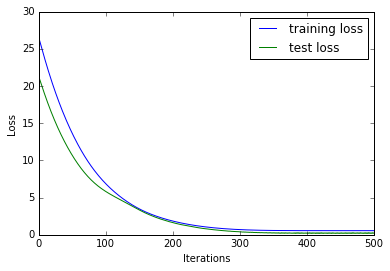

In [20]:
%matplotlib inline
plot_x = np.linspace(1, iters, iters)
train_loss_AdaDelta = np.array(train_loss_AdaDelta)
test_loss_AdaDelta = np.array(test_loss_AdaDelta)
plt.figure(1)
plt.plot(plot_x, train_loss_AdaDelta, label="training loss")
plt.plot(plot_x, test_loss_AdaDelta, label="test loss")
plt.legend(loc="upper right")
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

In [21]:
ytest_ = predict(X_test, weigh_AdaDelta)
target_names = ['class 1', 'class 2']
print(classification_report(y_test, ytest_.T[0], target_names=target_names))

             precision    recall  f1-score   support

    class 1       0.76      1.00      0.87     12435
    class 2       0.00      0.00      0.00      3846

avg / total       0.58      0.76      0.66     16281



F:\python\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [22]:
def train_in_Adam(X_train, y_train, X_test, y_test): 
    C = 1
    percent = 0.2
    id_list = [x for x in range(0, X_train.shape[0])]
    
    train_loss = []
    test_loss = []
    
    app = np.ones(X_train.shape[0]).reshape(-1, 1)
    X_train = np.append(X_train,app,axis=1)
    
    app_test = np.ones(X_test.shape[0]).reshape(-1, 1)
    app_test_zeors = np.zeros(X_test.shape[0]).reshape(-1, 1)
    #print(X_test.shape)
    X_test = np.append(X_test,app_test_zeors,axis=1)
    X_test = np.append(X_test,app_test,axis=1)  
    weight = random.random(size=(X_train.shape[1], 1))
    
    gt = 0
    epsilon = 0.001
    gamma = 0.999
    mt = 0
    a = 0.01
    beta = 0.9
    t = 0
    for i in range(iters):
        t = t + 1
        
        id_ = rd.sample(id_list, int(X_train.shape[0] * percent)) 
        X_train_sub = X_train[id_]
        y_train_sub = y_train[id_]
        
        y_ = np.dot(X_train, weight)
        cn_tmp = 1 - y_train.reshape(-1, 1) * y_      
        cn_tmp[cn_tmp < 0] = 0
        
        w = np.sum(np.power(weight, 2))
        
        loss = np.sum(cn_tmp, axis=0)
        loss = C * loss / X_train.shape[0] + w / 2
        train_loss.append(loss[0])
        
        y_test = np.dot(X_test, weight)
        cn_tmp_test = 1 - y_test.reshape(-1, 1) * y_test      
        cn_tmp_test[cn_tmp_test < 0] = 0
        loss_ = np.sum(cn_tmp_test, axis=0)
        loss_ = C * loss_ / X_test.shape[0] + w/2
        test_loss.append(loss_[0])
        
        y_ = np.dot(X_train_sub, weight)
        tmp = 1 - y_train_sub.reshape(-1, 1) * y_
        tmp[tmp > 0] = 1
        tmp[tmp <= 0] = 0
        
        d = y_train_sub.reshape(-1, 1) * X_train_sub
        d = d * tmp
        d = -np.mean(d, axis=0)
        d =  weight + C * d.reshape(-1, 1)
        
        mt = beta * mt + (1 - beta) * d
        gt = gamma * gt + (1 - gamma) * d * d
        
        mt_ = mt / (1 - np.power(beta, t))
        gt_ = gt / (1 - np.power(gamma, t))
        
        weight = weight - a * mt_ / (np.sqrt(gt_) + epsilon )
    return train_loss, test_loss, weight

In [23]:
train_loss_Adam, test_loss_Adam, weigh_Adam = train_in_Adam(X_train, y_train, X_test, y_test)

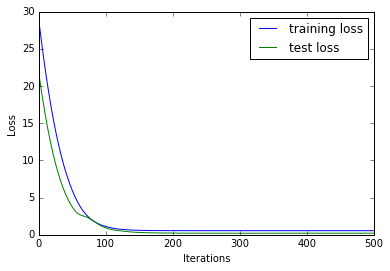

In [24]:
%matplotlib inline
plot_x = np.linspace(1, iters, iters)
train_loss_Adam = np.array(train_loss_Adam)
test_loss_Adam = np.array(test_loss_Adam)
plt.figure(1)
plt.plot(plot_x, train_loss_Adam, label="training loss")
plt.plot(plot_x, test_loss_Adam, label="test loss")
plt.legend(loc="upper right")
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

In [25]:
ytest_ = predict(X_test, weigh_Adam)
target_names = ['class 1', 'class 2']
print(classification_report(y_test, ytest_.T[0], target_names=target_names))

             precision    recall  f1-score   support

    class 1       0.76      1.00      0.87     12435
    class 2       0.00      0.00      0.00      3846

avg / total       0.58      0.76      0.66     16281



F:\python\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


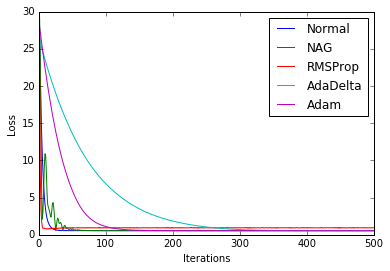

In [26]:
%matplotlib inline
plt.figure(1)
plt.plot(plot_x, train_loss_gd, label="Normal")
plt.plot(plot_x, train_loss_NAG, label="NAG")
plt.plot(plot_x, train_loss_RMSProp, label="RMSProp")
plt.plot(plot_x, train_loss_AdaDelta, label="AdaDelta")
plt.plot(plot_x, train_loss_Adam, label="Adam")
plt.legend(loc="upper right")
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

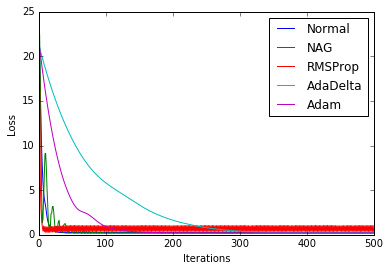

In [27]:
%matplotlib inline
plt.figure(1)
plt.plot(plot_x, test_loss_gd, label="Normal")
plt.plot(plot_x, test_loss_NAG, label="NAG")
plt.plot(plot_x, test_loss_RMSProp, label="RMSProp")
plt.plot(plot_x, test_loss_AdaDelta, label="AdaDelta")
plt.plot(plot_x, test_loss_Adam, label="Adam")
plt.legend(loc="upper right")
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()